In [181]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = leeh;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
display (dfOriginal[0:4] )
#for c in dfOriginal.columns: print (c,  end=', ')

<IPython.core.display.Javascript object>

,cname,ampm,timeofday,dateofmeasure,pef1,pef2,pef3,pefmax,indexpef,so2,co,o3,no2,pm10,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperaturecpoi,rainfallmmpoi,windspeedmspoi,precipitationpercentpoi,vaporpressurehpapoi,dewpointtemperaturecpoi,airpressurehpapoi,sealevelpressurehpapoi,groundtemperaturecpoi,winddirection,winddirectionpoi,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tmaxpoi,amaxpoi,pmaxpoi,tminpoi,aminpoi,pminpoi,tmodepoi,amodepoi,pmodepoi,tmaxlesstminpoi,amaxlessaminpoi,pmaxlesspminpoi,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime,so2maxpoi,so2maxtimepoi,so2minpoi,so2mintimepoi,comaxpoi,comaxtimepoi,cominpoi,comintimepoi,o3maxpoi,o3maxtimepoi,o3minpoi,o3mintimepoi,no2maxpoi,no2maxtimepoi,no2minpoi,no2mintimepoi,pm10maxpoi,pm10maxtimepoi,pm10minpoi,pm10mintimepoi
0,leeh,am,09:06:00,2015-03-10,207.000,222.000,230.000,230.000,Y,0.196,14.700,0.706,0.627,1363.000,0.174,11.400,0.553,0.636,1309.000,-5.000,1.008,10.700,44.000,1.900,-15.300,1018.300,1027.600,-1.300,-5.000,1.008,10.700,44.000,1.900,-15.300,1018.300,1027.600,-1.300,340.000,340.000,4.600,1017.800,90.000,-5.900,1000.000,44.000,4.100,1012.500,49.000,10.500,17.800,46.000,4.600,1017.800,90.000,-5.900,1000.000,44.000,4.100,1012.500,49.000,10.500,17.800,46.000,0.011,19.000,0.005,16.000,0.700,9.000,0.500,16.000,0.042,2.000,0.022,19.000,0.042,9.000,0.007,2.000,93.000,9.000,39.000,8.000,0.010,11.000,0.005,17.000,0.800,9.000,0.400,16.000,0.031,2.000,0.013,22.000,0.068,9.000,0.008,3.000,117.000,9.000,21.000,3.000
1,leeh,am,09:00:00,2015-03-11,240.000,253.000,230.000,253.000,Y,0.265,17.100,0.578,0.787,882.617,0.145,11.400,0.505,0.699,693.000,1.000,1.008,3.600,66.000,4.300,-4.600,1012.400,1021.400,-0.100,1.000,1.008,3.600,66.000,4.300,-4.600,1012.400,1021.400,-0.100,230.000,230.000,-0.100,1018.500,65.000,-5.000,1000.000,38.000,-2.000,1015.700,65.000,4.900,18.500,27.000,-0.100,1018.500,65.000,-5.000,1000.000,38.000,-2.000,1015.700,65.000,4.900,18.500,27.000,0.022,22.000,0.007,15.000,1.000,8.000,0.600,14.000,0.034,3.000,0.004,8.000,0.083,8.000,0.017,3.000,59.000,8.000,23.000,4.000,0.008,9.000,0.005,12.000,0.700,8.000,0.400,10.000,0.035,4.000,0.025,8.000,0.056,8.000,0.010,4.000,42.000,23.000,17.000,8.000
2,leeh,am,09:01:00,2015-03-12,256.000,208.000,229.000,256.000,Y,0.197,18.400,0.525,1.025,1156.000,0.165,13.600,0.491,0.845,891.000,1.200,1.008,2.500,53.000,3.500,-7.300,1012.600,1021.600,0.000,1.200,1.008,2.500,53.000,3.500,-7.300,1012.600,1021.600,0.000,270.000,270.000,5.500,1013.000,73.000,-1.400,1000.000,50.000,-1.400,1012.000,56.000,6.900,13.000,23.000,5.500,1013.000,73.000,-1.400,1000.000,50.000,-1.400,1012.000,56.000,6.900,13.000,23.000,0.013,9.000,0.004,18.000,1.000,9.000,0.700,11.000,0.034,14.000,0.005,9.000,0.073,9.000,0.024,3.000,101.000,14.000,27.000,4.000,0.012,14.000,0.005,24.000,0.800,14.000,0.400,6.000,0.035,3.000,0.034,8.000,0.062,8.000,0.012,3.000,66.000,15.000,17.000,8.000
3,leeh,am,09:30:00,2015-03-13,240.000,246.000,254.000,254.000,Y,0.153,16.300,0.501,1.014,981.000,0.155,12.400,0.598,0.741,1147.000,3.600,1.008,2.100,90.000,7.100,2.100,1010.600,1019.500,4.600,3.600,1.008,2.100,90.000,7.100,2.100,1010.600,1019.500,4.600,360.000,360.000,4.900,1012.600,99.000,1.200,1000.000,41.000,4.600,1009.500,99.000,3.700,12.600,58.000,4.900,1012.600,99.000,1.200,1000.000,41.000,4.600,1009.500,99.000,3.700,12.600,58.000,0.009,9.000,0.003,18.000,0.900,9.000,0.500,17.000,0.036,4.000,0.006,7.000,0.062,21.000,0.026,3.000,86.000,5.000,20.000,17.000,0.009,24.000,0.005,4.000,0.800,5.000,0.400,12.000,0.036,14.000,0.033,8.000,0.057,9.000,0.016,13.000,102.000,7.000,21.000,21.000


In [182]:
df=dfOriginal.copy()
df.insert(4, 'npt',0)
df.insert(4, 'pef',0)
df.npt = pd.notnull(df.pef1)*1 + pd.notnull(df.pef2)*1 + pd.notnull(df.pef3)*1
df = df[df.npt > 0]
df=df.reset_index(drop=True)
df.pef = (df.pef1 + df.pef2 + df.pef3)/df.npt

df=df.fillna(0)
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
sdttm = df.dateofmeasure + " " + df.timeofday
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pefmax, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)

#df.to_csv("HanD/hand1.csv", sep=';')
df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')
df1

,pef,so2,co,o3,no2,pm10,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperaturecpoi,rainfallmmpoi,windspeedmspoi,precipitationpercentpoi,vaporpressurehpapoi,dewpointtemperaturecpoi,airpressurehpapoi,sealevelpressurehpapoi,groundtemperaturecpoi,winddirection,winddirectionpoi,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tmaxpoi,amaxpoi,pmaxpoi,tminpoi,aminpoi,pminpoi,tmodepoi,amodepoi,pmodepoi,tmaxlesstminpoi,amaxlessaminpoi,pmaxlesspminpoi,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime,so2maxpoi,so2maxtimepoi,so2minpoi,so2mintimepoi,comaxpoi,comaxtimepoi,cominpoi,comintimepoi,o3maxpoi,o3maxtimepoi,o3minpoi,o3mintimepoi,no2maxpoi,no2maxtimepoi,no2minpoi,no2mintimepoi,pm10maxpoi,pm10maxtimepoi,pm10minpoi,pm10mintimepoi
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-09 21:00:00,232.667,0.210,18.000,0.666,1.055,2240.000,0.221,17.500,0.567,0.961,2347.000,-3.900,1.008,8.500,51.000,2.300,-12.500,1015.300,1024.500,0.100,-3.900,1.008,8.500,51.000,2.300,-12.500,1015.300,1024.500,0.100,340.000,340.000,8.000,1014.800,90.000,-3.600,1000.000,49.000,5.800,1012.500,77.000,11.600,14.800,41.000,8.000,1014.800,90.000,-3.600,1000.000,49.000,5.800,1012.500,77.000,11.600,14.800,41.000,0.014,1.000,0.005,16.000,1.000,24.000,0.500,16.000,0.049,4.000,0.008,7.000,0.083,24.000,0.022,4.000,156.000,1.000,44.000,14.000,0.016,1.000,0.005,17.000,1.000,21.000,0.400,16.000,0.039,4.000,0.003,21.000,0.070,8.000,0.020,4.000,137.000,3.000,39.000,19.000
2015-03-10 09:06:00,219.667,0.196,14.700,0.706,0.627,1363.000,0.174,11.400,0.553,0.636,1309.000,-5.000,1.008,10.700,44.000,1.900,-15.300,1018.300,1027.600,-1.300,-5.000,1.008,10.700,44.000,1.900,-15.300,1018.300,1027.600,-1.300,340.000,340.000,4.600,1017.800,90.000,-5.900,1000.000,44.000,4.100,1012.500,49.000,10.500,17.800,46.000,4.600,1017.800,90.000,-5.900,1000.000,44.000,4.100,1012.500,49.000,10.500,17.800,46.000,0.011,19.000,0.005,16.000,0.700,9.000,0.500,16.000,0.042,2.000,0.022,19.000,0.042,9.000,0.007,2.000,93.000,9.000,39.000,8.000,0.010,11.000,0.005,17.000,0.800,9.000,0.400,16.000,0.031,2.000,0.013,22.000,0.068,9.000,0.008,3.000,117.000,9.000,21.000,3.000
2015-03-10 21:30:00,249.000,0.220,15.600,0.686,0.579,1097.617,0.161,10.300,0.545,0.569,757.000,-1.900,1.008,7.600,53.000,2.800,-10.200,1015.700,1024.800,-0.100,-1.900,1.008,7.600,53.000,2.800,-10.200,1015.700,1024.800,-0.100,340.000,340.000,-0.100,1018.500,55.000,-5.900,1000.000,38.000,-5.900,1015.300,49.000,5.800,18.500,17.000,-0.100,1018.500,55.000,-5.900,1000.000,38.000,-5.900,1015.300,49.000,5.800,18.500,17.000,0.011,22.000,0.007,2.000,0.800,17.000,0.600,20.000,0.042,2.000,0.019,20.000,0.042,18.000,0.007,2.000,68.000,21.000,28.000,19.000,0.010,5.000,0.005,12.000,0.500,21.000,0.400,22.000,0.031,2.000,0.013,22.000,0.037,20.000,0.008,3.000,52.000,23.000,21.000,3.000
2015-03-11 09:00:00,241.000,0.265,17.100,0.578,0.787,882.617,0.145,11.400,0.505,0.699,693.000,1.000,1.008,3.600,66.000,4.300,-4.600,1012.400,1021.400,-0.100,1.000,1.008,3.600,66.000,4.300,-4.600,1012.400,1021.400,-0.100,230.000,230.000,-0.100,1018.500,65.000,-5.000,1000.000,38.000,-2.000,1015.700,65.000,4.900,18.500,27.000,-0.100,1018.500,65.000,-5.000,1000.000,38.000,-2.000,1015.700,65.000,4.900,18.500,27.000,0.022,22.000,0.007,15.000,1.000,8.000,0.600,14.000,0.034,3.000,0.004,8.000,0.083,8.000,0.017,3.000,59.000,8.000,23.000,4.000,0.008,9.000,0.005,12.000,0.700,8.000,0.400,10.000,0.035,4.000,0.025,8.000,0.056,8.000,0.010,4.000,42.000,23.000,17.000,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

pef, so2, co, o3, no2, pm10, so2poi, copoi, o3poi, no2poi, pm10poi, temperaturec, rainfallmm, windspeedms, precipitationpercent, vaporpressurehpa, dewpointtemperaturec, airpressurehpa, sealevelpressurehpa, groundtemperaturec, temperaturecpoi, rainfallmmpoi, windspeedmspoi, precipitationpercentpoi, vaporpressurehpapoi, dewpointtemperaturecpoi, airpressurehpapoi, sealevelpressurehpapoi, groundtemperaturecpoi, winddirection, winddirectionpoi, tmax, amax, pmax, tmin, amin, pmin, tmode, amode, pmode, tmaxlesstmin, amaxlessamin, pmaxlesspmin, tmaxpoi, amaxpoi, pmaxpoi, tminpoi, aminpoi, pminpoi, tmodepoi, amodepoi, pmodepoi, tmaxlesstminpoi, amaxlessaminpoi, pmaxlesspminpoi, so2max, so2maxtime, so2min, so2mintime, comax, comaxtime, comin, comintime, o3max, o3maxtime, o3min, o3mintime, no2max, no2maxtime, no2min, no2mintime, pm10max, pm10maxtime, pm10min, pm10mintime, so2maxpoi, so2maxtimepoi, so2minpoi, so2mintimepoi, comaxpoi, comaxtimepoi, cominpoi, comintimepoi, o3maxpoi, o3maxtimepoi, o3

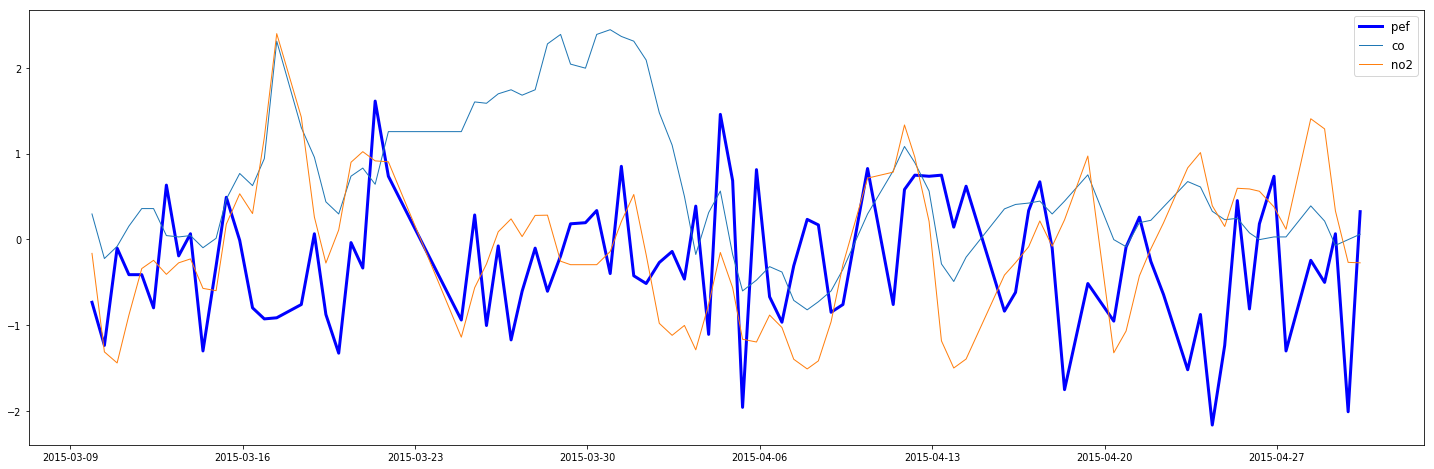

In [183]:
for c in df1.columns:
    print(c, end=', ')

scaler = StandardScaler()
dp = prepareDF(df1, True)
for c in dp.columns:
    dp[c] = scaler.fit_transform(dp[c])

plt.figure(figsize=(25, 8))
plt.rc('font', size=14)

dp = dp[0:90]
#dp = dp["pef,so2,co,o3,no2,pm10,tmax,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec".split(',')]
#dp = dp["pef,so2,co,o3,no2,pm10,temperaturec,rainfallmm,windspeedms,vaporpressurehpa".split(',')]
#dp = dp["pef,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,vaporpressurehpa".split(',')]

rolmean = pd.rolling_mean(dp.pef, window=12)

plt.plot(dp.index, dp.pef, color='b', linewidth=3)
#plt.plot(dp.index, rolmean, color='r', linewidth=2, label='trend')
#plt.plot(dp.index, dp.so2)
plt.plot(dp.index, dp.co)
#plt.plot(dp.index, dp.o3)
plt.plot(dp.index, dp.no2)
#plt.plot(dp.index, dp.pm10)
#plt.plot(dp.index, dp.tmax)
#plt.plot(dp.index, dp.amax)
#plt.plot(dp.index, dp.pmax)

plt.legend()

In [184]:
#display(HTML(dp.to_html()) )


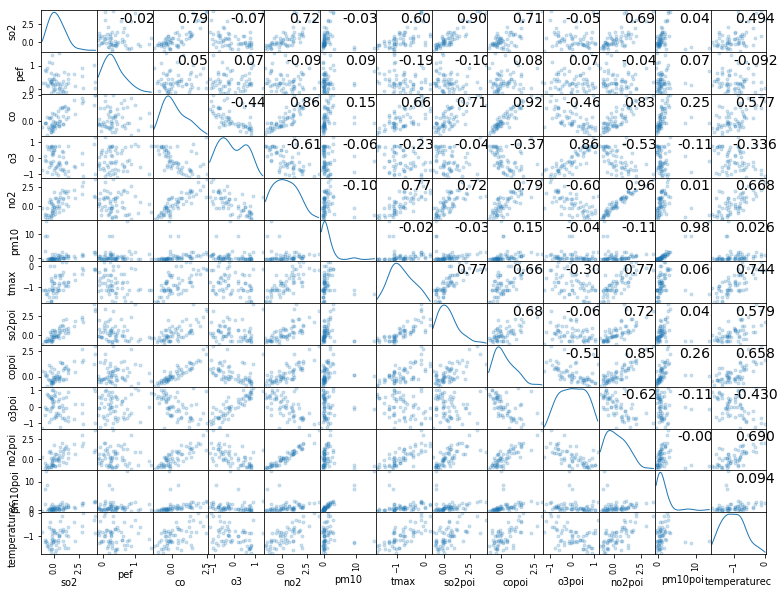

In [109]:
c="r,g,b,c,m,y,k,w".split(",")
axes = scatter_matrix(dp, alpha=0.2, diagonal='kde', figsize=(13, 10)); # diagonal can be 'hist';

corr = dp.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()


In [185]:
def run_reg(X,y,reg_class,printDebug = False , reg=None):
    # Construct a kfolds object
    kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

    # Iterate through folds\
    i = 0;
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = reg_class(**kwargs) if (reg is None)  else reg;
        if (printDebug): print ("*",i, end ="");
        reg.fit(X_train,y_train)
        y_pred[test_index] = reg.predict(X_test)
        i = i +1;
    if (printDebug): print ("*");
    return y_pred, clf

* 0* 1* 2* 3* 4*
* 0* 1* 2* 3* 4*


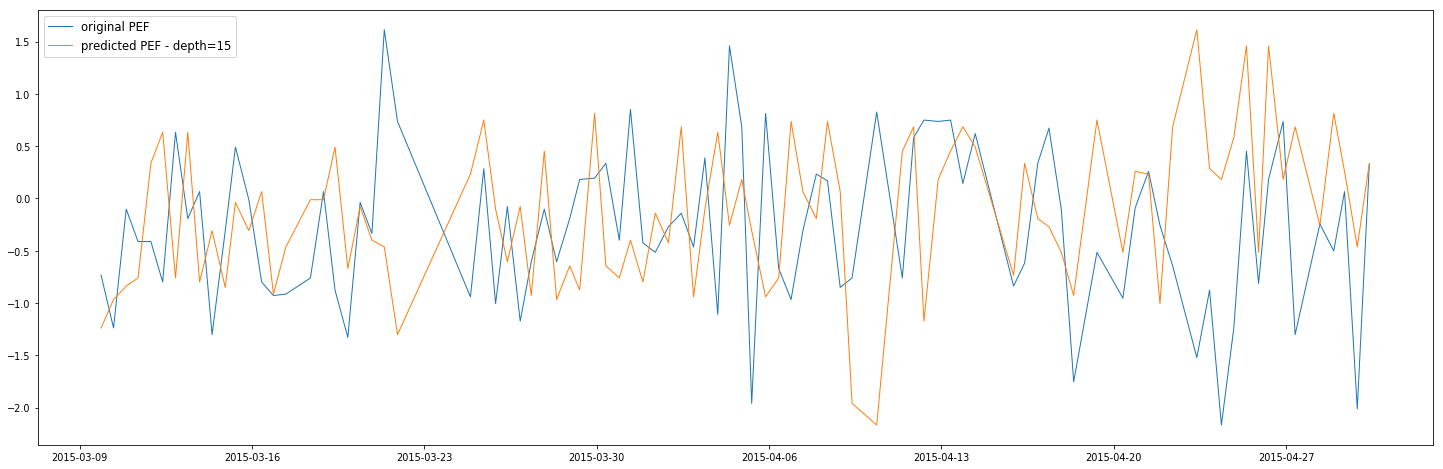

In [186]:
from sklearn.tree import DecisionTreeRegressor

#dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]

dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

X = dp1.ix[:, dp1.columns != 'pef']
y = dp1.pef
X = X.as_matrix().astype(np.float)

##---- Polynomial features
p = PolynomialFeatures(3)
o = p.fit_transform(X)
X = o


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=15)
#regr_1.fit(X, y)
#regr_2.fit(X, y)
y1 = run_reg(X,y, None, True, regr_1)
y2 = run_reg(X,y, None, True, regr_2)

plt.figure(figsize=(25, 8))
plt.plot(dp.index,y, label='original PEF')
#plt.plot(y1[0])
plt.plot(dp.index, y2[0], label='predicted PEF - depth=15')
plt.legend()

In [180]:
#display(HTML(dp[15:20].to_html()) )


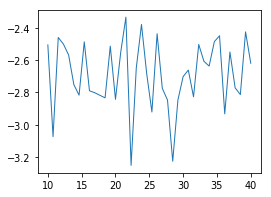

In [106]:
from sklearn.model_selection import cross_val_score
m = list()
ds = np.linspace(10, 40, 40)
for d in (ds):
    r = DecisionTreeRegressor(max_depth=d)
    a = cross_val_score(r, X, y, cv=10)
    m.append(np.mean(a))
    #print(d, a)
    
plt.plot(ds, m)


In [107]:
#np.mean(y1[0] - y)
#r.feature_importances_
r.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor(criterion='mse', max_depth=40.0, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>